In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [81]:
boston=load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [82]:
X=boston.data
y=boston.target

In [83]:
X.shape # thirteen features

(506, 13)

In [84]:
X=pd.DataFrame(boston.data,columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [85]:
X.shape

(506, 13)

In [86]:
from sklearn.feature_selection import mutual_info_regression,VarianceThreshold

# Variance threshold

In [87]:
vt=VarianceThreshold(threshold=0.2)
X_var=vt.fit_transform(X)

In [88]:
X_var.shape

(506, 11)

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X_var,y,test_size=0.2)

In [90]:
X_train.shape

(404, 11)

In [91]:
X_test.shape

(102, 11)

# Mutual information regression

In [92]:
X.shape

(506, 13)

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [94]:
mi=mutual_info_regression(X,y)
mi

array([0.33587848, 0.16938175, 0.46234218, 0.        , 0.46455344,
       0.52945634, 0.31015535, 0.3008638 , 0.20873302, 0.37988232,
       0.43815427, 0.16479327, 0.66511624])

In [95]:
mi=pd.Series(mi)

In [99]:
mi

0     0.335878
1     0.169382
2     0.462342
3     0.000000
4     0.464553
5     0.529456
6     0.310155
7     0.300864
8     0.208733
9     0.379882
10    0.438154
11    0.164793
12    0.665116
dtype: float64

In [100]:
mi.index=X_train.columns
mi.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

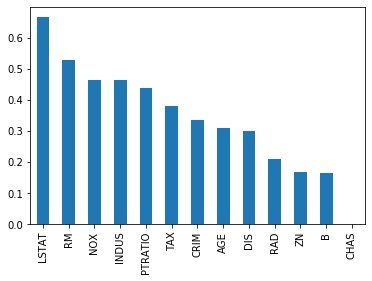

In [112]:
#lets plot them
import matplotlib.pyplot as plt
%matplotlib inline
mi.sort_values(ascending=False,inplace=True)
mi.plot.bar()


# Mutual information classification

In [114]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import mutual_info_classif

In [115]:
cancer=load_breast_cancer()
dir(cancer)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [118]:
X=pd.DataFrame(cancer.data,columns=cancer.feature_names)
y=pd.DataFrame(cancer.target,columns=["target"])

In [119]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [120]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [121]:
X.shape

(569, 30)

In [124]:
#lets check the mutual information to get best features out of the 30 features
mi=mutual_info_classif(X,y)

C:\Users\vidya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
mi

array([0.3669259 , 0.09565917, 0.4017164 , 0.3599566 , 0.0786873 ,
       0.21103885, 0.37492096, 0.43983511, 0.05926543, 0.00683654,
       0.25077621, 0.        , 0.27755903, 0.3396627 , 0.01502505,
       0.07517857, 0.11606304, 0.1224936 , 0.01296809, 0.03776311,
       0.45479024, 0.12273198, 0.47422397, 0.46484684, 0.098288  ,
       0.22812794, 0.31510647, 0.43637198, 0.09378746, 0.06901074])

In [130]:
mi=pd.Series(mi)
mi

0     0.366926
1     0.095659
2     0.401716
3     0.359957
4     0.078687
5     0.211039
6     0.374921
7     0.439835
8     0.059265
9     0.006837
10    0.250776
11    0.000000
12    0.277559
13    0.339663
14    0.015025
15    0.075179
16    0.116063
17    0.122494
18    0.012968
19    0.037763
20    0.454790
21    0.122732
22    0.474224
23    0.464847
24    0.098288
25    0.228128
26    0.315106
27    0.436372
28    0.093787
29    0.069011
dtype: float64

In [132]:
mi.index=X.columns
mi

mean radius                0.366926
mean texture               0.095659
mean perimeter             0.401716
mean area                  0.359957
mean smoothness            0.078687
mean compactness           0.211039
mean concavity             0.374921
mean concave points        0.439835
mean symmetry              0.059265
mean fractal dimension     0.006837
radius error               0.250776
texture error              0.000000
perimeter error            0.277559
area error                 0.339663
smoothness error           0.015025
compactness error          0.075179
concavity error            0.116063
concave points error       0.122494
symmetry error             0.012968
fractal dimension error    0.037763
worst radius               0.454790
worst texture              0.122732
worst perimeter            0.474224
worst area                 0.464847
worst smoothness           0.098288
worst compactness          0.228128
worst concavity            0.315106
worst concave points       0

In [134]:
mi.sort_values(ascending=False,inplace=True)
mi

worst perimeter            0.474224
worst area                 0.464847
worst radius               0.454790
mean concave points        0.439835
worst concave points       0.436372
mean perimeter             0.401716
mean concavity             0.374921
mean radius                0.366926
mean area                  0.359957
area error                 0.339663
worst concavity            0.315106
perimeter error            0.277559
radius error               0.250776
worst compactness          0.228128
mean compactness           0.211039
worst texture              0.122732
concave points error       0.122494
concavity error            0.116063
worst smoothness           0.098288
mean texture               0.095659
worst symmetry             0.093787
mean smoothness            0.078687
compactness error          0.075179
worst fractal dimension    0.069011
mean symmetry              0.059265
fractal dimension error    0.037763
smoothness error           0.015025
symmetry error             0

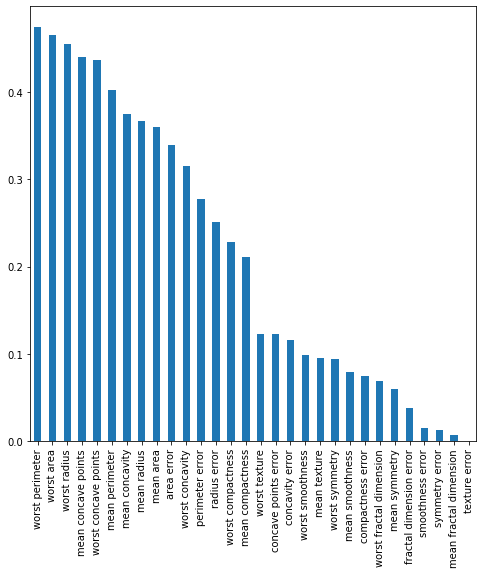

In [136]:
#plotiing features based on their mi values
mi.plot.bar(figsize=(8,8))